* Emoji Analysis [Done]
* Treemap
* Time series analysis [Done]
* Heatmap [Done]
* linear polar
* Sentiment Analysis

In [1]:
#!pip install tensorflow==2.11.*

In [2]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from transformers import pipeline

import emoji
from collections import Counter

from wordcloud import WordCloud, STOPWORDS

/home/arvin/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-13 10:14:05.355275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 10:14:05.685700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 10:14:05.685759: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your 

In [4]:
file = open("/home/arvin/Desktop/p3r50n47/WTA/whatsapp_chat.txt",'r',encoding='utf-8')

In [5]:
data = file.read()

In [6]:
data

'9/2/20, 7:00 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n9/17/20, 12:16 PM - Likith U CS Sahyadri: https://mayurpai.github.io/TuPhodega/index.html\n\nYou Can Share This Link With Your Friends Who Belong Only To CS And IS, As Third Sem Notes I\'ve Already Iploadrd ❤️\n11/19/20, 9:16 AM - +91 80880 44907: <Media omitted>\n12/26/20, 10:47 PM - Abhishek Pai Sahyadri: <Media omitted>\n2/22/21, 10:55 AM - Abhishek Pai Sahyadri: <Media omitted>\n3/2/21, 1:34 PM - +91 98454 17225: <Media omitted>\n6/5/21, 10:42 AM - Abhishek Pai Sahyadri: Join Math class\n6/5/21, 11:46 AM - SAP da Dharithri: Do we have dc clas?\n6/5/21, 11:47 AM - Abhishek Pai Sahyadri: Yeah\n6/5/21, 11:58 AM - SAP da Dharithri: She did not send link right?\n6/5/21, 11:59 AM - +91 82777 93723: https://meet.google.com/kiv-cknt-trp\nplease join at 11:45\n6/5/21, 11:59 AM - Sowrabh Sahya: This message was deleted\n6/5/21, 11:59 

In [7]:
msg = '''9/2/20, 7:00 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
        \n9/17/20, 12:16 PM - Likith U CS Sahyadri: https://mayurpai.github.io/TuPhodega/index.html\n\nYou Can Share This Link With Your Friends Who Belong Only To CS And IS, As Third Sem Notes I\'ve Already Iploadrd ❤️
        \n11/19/20, 9:16 AM - +91 80880 44907: <Media omitted>
        \n12/26/20, 10:47 PM - Abhishek Pai Sahyadri: <Media omitted>
        \n2/22/21, 10:55 AM - Abhishek Pai Sahyadri: <Media omitted>\n'''

res = re.findall('(\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2} [AaPp][Mm]) - (.+)',data)

date =[]
message = []

if res:
    for x in res:
        date.append(x[0])
        message.append(x[1])

print(date)

['9/2/20, 7:00 AM', '9/17/20, 12:16 PM', '11/19/20, 9:16 AM', '12/26/20, 10:47 PM', '2/22/21, 10:55 AM', '3/2/21, 1:34 PM', '6/5/21, 10:42 AM', '6/5/21, 11:46 AM', '6/5/21, 11:47 AM', '6/5/21, 11:58 AM', '6/5/21, 11:59 AM', '6/5/21, 11:59 AM', '6/5/21, 11:59 AM', '6/5/21, 11:59 AM', '6/5/21, 11:59 AM', '6/5/21, 12:00 PM', '6/5/21, 12:37 PM', '6/5/21, 12:37 PM', '6/5/21, 12:39 PM', '6/5/21, 12:39 PM', '6/5/21, 12:39 PM', '6/5/21, 12:39 PM', '6/5/21, 12:40 PM', '6/5/21, 12:40 PM', '6/5/21, 12:40 PM', '6/5/21, 12:40 PM', '6/5/21, 12:41 PM', '6/5/21, 12:41 PM', '6/5/21, 12:41 PM', '6/5/21, 12:41 PM', '6/5/21, 12:41 PM', '6/5/21, 12:42 PM', '6/5/21, 12:42 PM', '6/5/21, 12:42 PM', '6/5/21, 12:43 PM', '6/5/21, 12:44 PM', '6/5/21, 12:46 PM', '6/5/21, 10:13 PM', '6/5/21, 10:13 PM', '6/7/21, 9:33 AM', '6/8/21, 8:26 AM', '6/8/21, 8:31 AM', '6/8/21, 8:31 AM', '6/8/21, 10:33 AM', '6/8/21, 10:35 AM', '6/8/21, 10:36 AM', '6/8/21, 1:35 PM', '6/8/21, 2:16 PM', '6/8/21, 2:16 PM', '6/8/21, 2:16 PM', '6/8

In [8]:
text = 'Likith U CS Sahyadri: https://mayurpai.github.io/TuPhodega/index.html\n\nYou Can Share This Link With Your Friends Who'

if ':' in text:
    print('m')
print(text.split(':',1)[0])
print(text.split(':',1)[1])

m
Likith U CS Sahyadri
 https://mayurpai.github.io/TuPhodega/index.html

You Can Share This Link With Your Friends Who


In [9]:

user = []
msg = []

for x in message:
    if ': ' in x:
        user.append(x.split(':',1)[0])
        msg.append(x.split(':',1)[1])
    else:
        user.append("Notification")
        msg.append(x)

print(user)

['Notification', 'Likith U CS Sahyadri', '+91 80880 44907', 'Abhishek Pai Sahyadri', 'Abhishek Pai Sahyadri', '+91 98454 17225', 'Abhishek Pai Sahyadri', 'SAP da Dharithri', 'Abhishek Pai Sahyadri', 'SAP da Dharithri', '+91 82777 93723', 'Sowrabh Sahya', 'Sohan Bangude', 'SAP da Dharithri', 'SAP da Dharithri', 'SAP da Dharithri', 'SAP da Dharithri', 'SAP da Dharithri', 'Sohan Bangude', 'Boomika Sahyadri', 'SAP da Dharithri', 'Boomika Sahyadri', 'SAP da Dharithri', 'Boomika Sahyadri', 'SAP da Dharithri', 'SAP da Dharithri', 'Kailash Sahya', 'SAP da Dharithri', 'Boomika Sahyadri', 'Boomika Sahyadri', 'Kailash Sahya', 'Sohan Bangude', 'Boomika Sahyadri', 'SAP da Dharithri', 'SAP da Dharithri', 'Kailash Sahya', '+91 74249 47825', 'Sohan Bangude', 'Sohan Bangude', '+91 91191 46001', 'Abhishek Pai Sahyadri', '+91 91191 46001', '+91 91191 46001', 'Abhishek Pai Sahyadri', 'Abhishek Pai Sahyadri', '+91 91191 46001', '+91 91191 46001', 'Abhishek Pai Sahyadri', 'Sohan Bangude', 'Abhishek Pai Sahy

In [10]:
df= pd.DataFrame({'date':date , 'name':user, 'message':msg})

In [11]:
df.sample(10)

date                   name  \
14898    8/15/22, 8:13 AM  Abhishek Pai Sahyadri   
9066    1/27/22, 11:26 AM            Rahul Sahya   
4616     10/1/21, 8:57 AM            Rahul Sahya   
16433  11/19/22, 12:08 PM        +91 82777 93723   
3096     8/6/21, 11:10 AM          Sohan Bangude   
16522   11/29/22, 6:28 PM        +91 96067 80002   
5861    10/30/21, 7:08 PM            Rahul Sahya   
5840    10/29/21, 7:31 PM         Gayathri Sahya   
2789    7/31/21, 10:13 AM           Sanath Sahya   
8602    1/20/22, 10:49 AM  Abhishek Pai Sahyadri   

                                                 message  
14898                                    <Media omitted>  
9066                       Papa mare internal ge kalpad😂  
4616                                    Yeth jana ullar?  
16433   If anyone can participate in any of the above...  
3096                                ready maltd bala😂😂😂😂  
16522                                    <Media omitted>  
5861                         Impress manpuna bele orind😝  
5840                                    It's soo good 🔥🔥  
2789                    Happy birthday @919353059824  🎉🎉  
8602                                    Join the session

In [12]:
df["date"] = pd.to_datetime(df["date"])

In [13]:
df.head()

date                   name  \
0 2020-09-02 07:00:00           Notification   
1 2020-09-17 12:16:00   Likith U CS Sahyadri   
2 2020-11-19 09:16:00        +91 80880 44907   
3 2020-12-26 22:47:00  Abhishek Pai Sahyadri   
4 2021-02-22 10:55:00  Abhishek Pai Sahyadri   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1    https://mayurpai.github.io/TuPhodega/index.html  
2                                    <Media omitted>  
3                                    <Media omitted>  
4                                    <Media omitted>

In [14]:
month_map = {
    1 : 'January',
    2 : 'Febraury',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

In [15]:
df['month'] = df["date"].dt.month.map(month_map)

In [16]:
df['year'] = df['date'].dt.year

In [17]:
df['day'] = df['date'].dt.day

In [18]:
week_map = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

In [19]:
df['week_day'] = df['date'].dt.weekday.map(week_map)

In [20]:
df['hours'] = df['date'].dt.hour

In [21]:
df['minute'] = df['date'].dt.minute

In [22]:
df["month_year"] = df["month"] + " " + df["year"].astype(str)

In [23]:
df.sample(20)

date                   name  \
15912 2022-10-22 10:17:00          Sowrabh Sahya   
5667  2021-10-28 09:19:00        +91 98454 17225   
1803  2021-07-19 07:26:00  Abhishek Pai Sahyadri   
2166  2021-07-24 10:51:00       SAP da Dharithri   
1145  2021-07-03 16:43:00       SAP da Dharithri   
6520  2021-11-10 22:29:00          Sohan Bangude   
7420  2021-12-08 11:47:00  Abhishek Pai Sahyadri   
13597 2022-06-07 05:45:00        +91 98454 17225   
1498  2021-07-09 13:55:00          bhavish Sahya   
15577 2022-10-08 08:42:00        +91 96066 96558   
1443  2021-07-09 11:14:00  Abhishek Pai Sahyadri   
2008  2021-07-22 17:14:00           Linux Aashay   
10495 2022-03-21 13:40:00  Abhishek Pai Sahyadri   
14094 2022-07-03 20:58:00  Abhishek Pai Sahyadri   
13773 2022-06-07 21:32:00  Abhishek Pai Sahyadri   
9216  2022-01-29 10:39:00          Sohan Bangude   
16072 2022-10-31 15:00:00        Adithya C Sahya   
8789  2022-01-22 13:03:00       SAP da Dharithri   
9801  2022-02-08 19:30:00  Abhishek Pai Sahyadri   
12385 2022-05-22 19:24:00       SAP da Dharithri   

                                                 message     month  year  day  \
15912                                    <Media omitted>   October  2022   22   
5667                                       Poster Making   October  2021   28   
1803             No DC class but we have MC ES in 1st hr      July  2021   19   
2166                                 What did she tell..      July  2021   24   
1145                                        32 bits atha      July  2021    3   
6520                                         ~in class~*  November  2021   10   
7420                     Ma'am is distributing blue book  December  2021    8   
13597                                    <Media omitted>      June  2022    7   
1498                                then i will do same'      July  2021    9   
15577                                       Thank you ✨✨   October  2022    8   
1443                       Vaccination is given priority      July  2021    9   
2008                                     <Media omitted>      July  2021   22   
10495   Data mining will help in higher semester itse...     March  2022   21   
14094                                                Yes      July  2022    3   
13773                                    <Media omitted>      June  2022    7   
9216                And a minus point for the noted ones   January  2022   29   
16072                                      @919008583470   October  2022   31   
8789                  Does wed batch have lab internals?   January  2022   22   
9801                                            Confirm?  Febraury  2022    8   
12385                    Team anda any number of members       May  2022   22   

        week_day  hours  minute     month_year  
15912     Friday     10      17   October 2022  
5667   Wednesday      9      19   October 2021  
1803      Sunday      7      26      July 2021  
2166      Friday     10      51      July 2021  
1145      Friday     16      43      July 2021  
6520     Tuesday     22      29  November 2021  
7420     Tuesday     11      47  December 2021  
13597     Monday      5      45      June 2022  
1498    Thursday     13      55      July 2021  
15577     Friday      8      42   October 2022  
1443    Thursday     11      14      July 2021  
2008   Wednesday     17      14      July 2021  
10495     Sunday     13      40     March 2022  
14094   Saturday     20      58      July 2022  
13773     Monday     21      32      June 2022  
9216      Friday     10      39   January 2022  
16072     Sunday     15       0   October 2022  
8789      Friday     13       3   January 2022  
9801      Monday     19      30  Febraury 2022  
12385   Saturday     19      24       May 2022

In [24]:
df.shape

(16934, 10)

### No.. of particiapants ["Common"]

In [25]:
len(df["name"].unique())

65

### No.. of media files ["Common"]





In [26]:
len(df["message"][df["message"] == " <Media omitted>"])

2281

### No.. of words used ["Common"]

In [27]:
sum(df["message"].apply(lambda x : len(x.split()) if(x!= " <Media omitted>" ) else  0))

65266

In [28]:
plt.style.use("dark_background")

### Analysis of chats based on the no.. of messages sent over a week ["Common"]

In [29]:
df[df["year"] == 2020].shape

(4, 10)

In [30]:
df.head()

date                   name  \
0 2020-09-02 07:00:00           Notification   
1 2020-09-17 12:16:00   Likith U CS Sahyadri   
2 2020-11-19 09:16:00        +91 80880 44907   
3 2020-12-26 22:47:00  Abhishek Pai Sahyadri   
4 2021-02-22 10:55:00  Abhishek Pai Sahyadri   

                                             message      month  year  day  \
0  Messages and calls are end-to-end encrypted. N...  September  2020    2   
1    https://mayurpai.github.io/TuPhodega/index.html  September  2020   17   
2                                    <Media omitted>   November  2020   19   
3                                    <Media omitted>   December  2020   26   
4                                    <Media omitted>   Febraury  2021   22   

    week_day  hours  minute      month_year  
0    Tuesday      7       0  September 2020  
1  Wednesday     12      16  September 2020  
2  Wednesday      9      16   November 2020  
3     Friday     22      47   December 2020  
4     Sunday     10      55   Febraury 2021

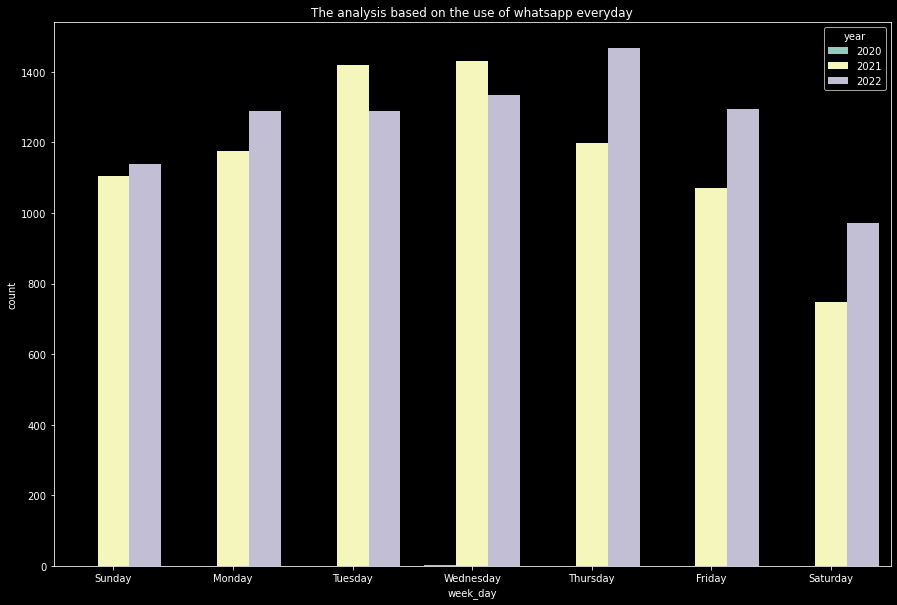

In [31]:
plt.figure(figsize=(15,10))

plt.title("The analysis based on the use of whatsapp everyday")

days_arr = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
bars = sns.countplot(data = df, x = df["week_day"], order = days_arr, hue = df["year"], )


### Analysis done over a period of month ["Common"]

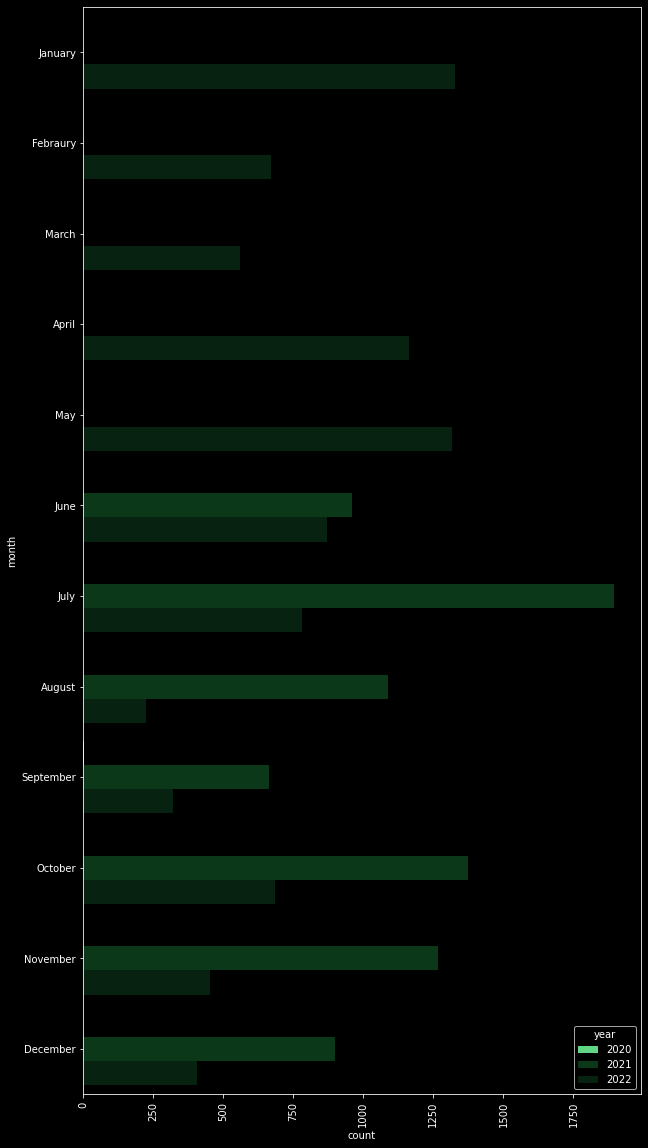

In [32]:
plt.figure(figsize=(10,20))
month_arr = ['January','Febraury','March','April','May','June','July','August','September','October','November','December']
plt.xticks(rotation = 90)
sns.countplot( y =df["month"],
              order = month_arr,
              hue = df["year"],
                palette = ["#4deb7f", "#024016fc" ,"#02270efc", "#011708fc" ,"#010b04","#046a24", "#035e20"]);


# Group chat analysis

### Analysis to find the participant who has sent the highest no.. of messages. ["Overall"]

In [33]:
df["name"].unique()

array(['Notification', 'Likith U CS Sahyadri', '+91 80880 44907',
       'Abhishek Pai Sahyadri', '+91 98454 17225', 'SAP da Dharithri',
       '+91 82777 93723', 'Sowrabh Sahya', 'Sohan Bangude',
       'Boomika Sahyadri', 'Kailash Sahya', '+91 74249 47825',
       '+91 91191 46001', 'Adithya C Sahya', 'Sanju Sahyadri',
       'Athul Aether', 'Darshan Sahya', 'Rahul Sahya', '+91 80958 17975',
       '+91 93534 33713', '+91 80881 54902', 'Anjali Sahya',
       'Shrishali Sahya', '+91 74832 02647', '+91 84318 41125',
       'Linux Aashay', 'Gayathri Sahya', 'Deekshith Sahya',
       '+91 96068 64460', 'bhavish Sahya', '+91 96112 45747',
       'Dheemanth Ajpu', 'Harshita Sahyadri', 'Akshay Gumma Sahya',
       '+91 87625 80427', '+91 91643 23797', 'Bhooshan Sahya',
       '+91 84319 87214', 'Ashwin Sahya', '+91 81056 92107',
       'Namitha CS Sahyadri', 'Dhananjay Sahya', 'Abhi Kenaje',
       '+91 96067 80002', 'Prathyush Sahya', '+91 6363 047 917',
       'Bupendar Sahya', '+91 96066

In [34]:
df["name"].value_counts()

Abhishek Pai Sahyadri    4323
SAP da Dharithri         2319
Sohan Bangude            1731
bhavish Sahya            1039
+91 91191 46001           870
                         ... 
+91 94814 57918             3
+91 97411 30958             3
+91 96067 91588             2
+91 84319 93120             2
+91 89710 75537             1
Name: name, Length: 65, dtype: int64

<AxesSubplot:xlabel='count', ylabel='name'>

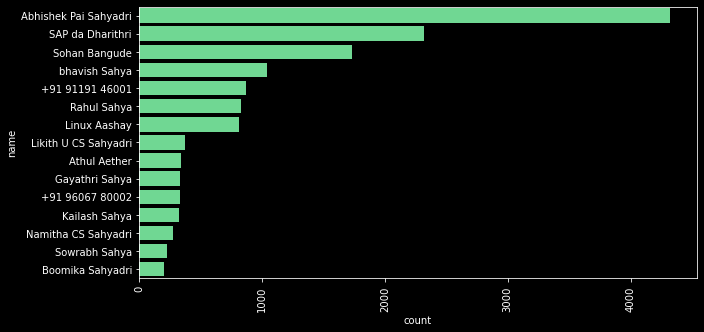

In [35]:
plt.style.use('dark_background')

plt.figure(figsize = (10,5))
plt.xticks(rotation= 90)
sns.countplot(y = 'name' , data = df , order = df["name"].value_counts().nlargest(15).index, palette = ["#5FE88D"])

## PIE chart of the week analysis  ["Overall"]

In [36]:
top_arr = df["name"].value_counts().nlargest(3).index
top_participants_df = pd.DataFrame()

for x in top_arr:
    top_participants_df = pd.concat([top_participants_df , df[df["name"] == x]])

In [37]:
top_participants_df.name.value_counts()

Abhishek Pai Sahyadri    4323
SAP da Dharithri         2319
Sohan Bangude            1731
Name: name, dtype: int64

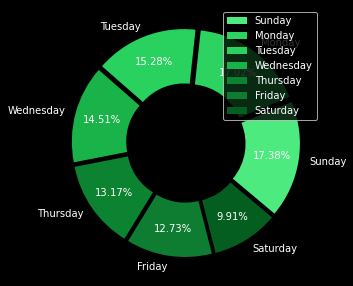

In [38]:
plt.figure(figsize=(10,5))

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie(top_participants_df["week_day"].value_counts(), labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],wedgeprops=dict(width = 0.5),startangle= -40 ,
        autopct= "%0.2f%%",pctdistance= 0.75,
        explode = explode ,
        colors = ["#4deb7f", "#2cd361", "#29d15e","#19b349","#0b8331", "#0f7f33fc", "#046021fc", "#024016fc" ,"#02270efc", "#011708fc" ,"#010b04","#046a24", "#035e20"]);

plt.legend(loc = "best")


## PIE chart of the monthly analysis ["Overall"]

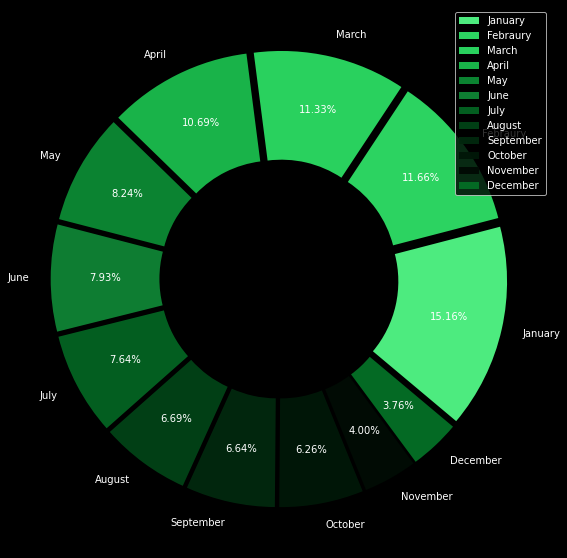

In [39]:
plt.figure(figsize=(10,10))

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie(top_participants_df["month"].value_counts(), labels = ['January','Febraury','March','April','May','June','July','August','September','October','November','December'],wedgeprops=dict(width = 0.5),startangle= -40 ,
        autopct= "%0.2f%%",pctdistance= 0.75,explode = explode,
        colors = ["#4deb7f", "#2cd361", "#29d15e","#19b349","#0b8331", "#0f7f33fc", "#046021fc", "#024016fc" ,"#02270efc", "#011708fc" ,"#010b04","#046a24", "#035e20"]);
        

plt.legend()

## PIE chart of the top chatting participants ["Overall"]

In [40]:
def plot_analysis(df):
    top_arr = df["name"].value_counts().nlargest(3).index
    
    for x in top_arr:
        plt.figure(figsize=(28,10))
        
        
        top_df = df[df["name"] == x]
        
        ### Week Analysis
        plt.subplot(1,3,1)
        plt.title(x + " - Weekly Analysis")

        explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

        plt.pie(top_df["week_day"].value_counts(), labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],wedgeprops=dict(width = 0.5),startangle= -40 , autopct= "%0.2f%%",pctdistance= 0.75,explode = explode);

        plt.legend(loc = "center")
        
        
        ### Month Analysis
        plt.subplot(1,3,2)

        plt.title(x + " - Monthly Analysis")
        explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

        plt.pie(top_df["month"].value_counts(), labels = ['January','Febraury','March','April','May','June','July','August','September','October','November','December'],wedgeprops=dict(width = 0.5),startangle= -40 ,
                autopct= "%0.2f%%",pctdistance= 0.75,explode = explode );

        plt.legend(loc = "center")


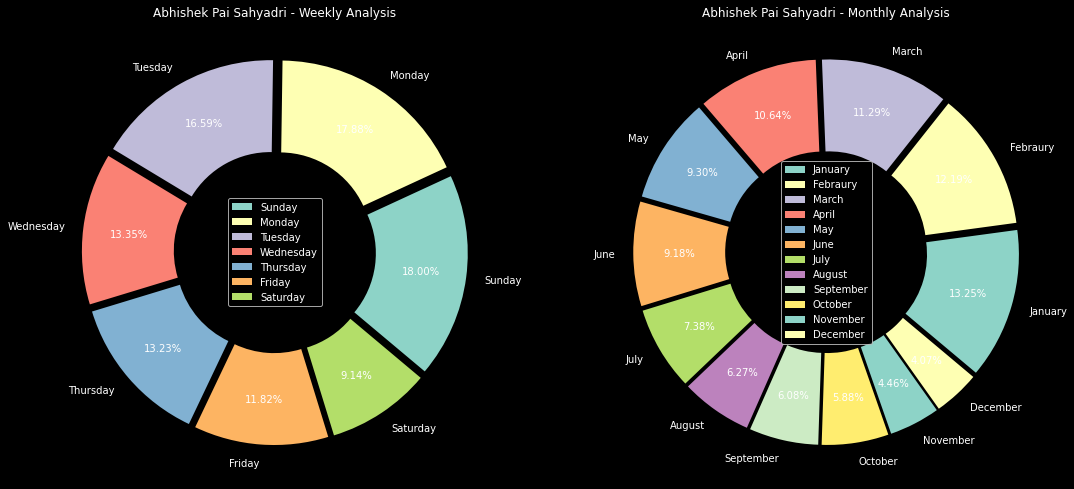

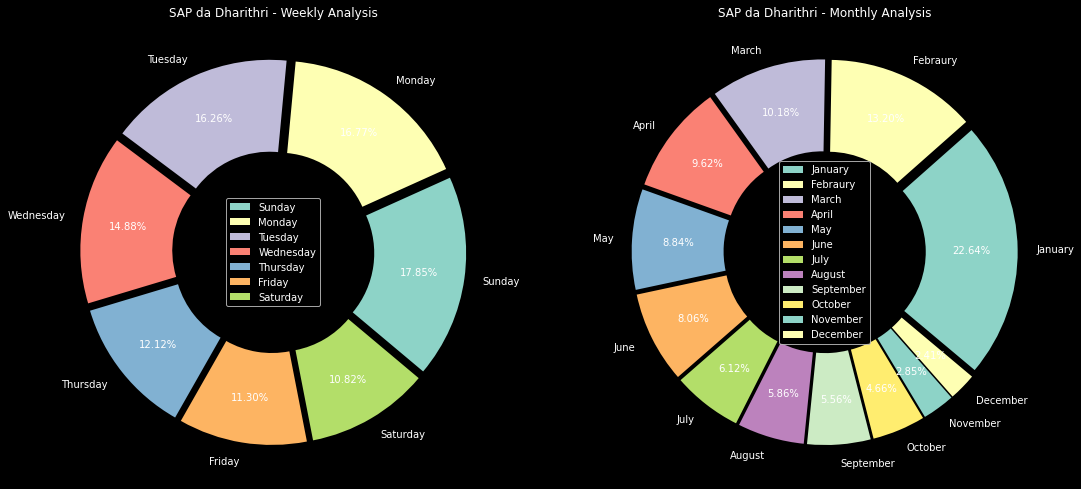

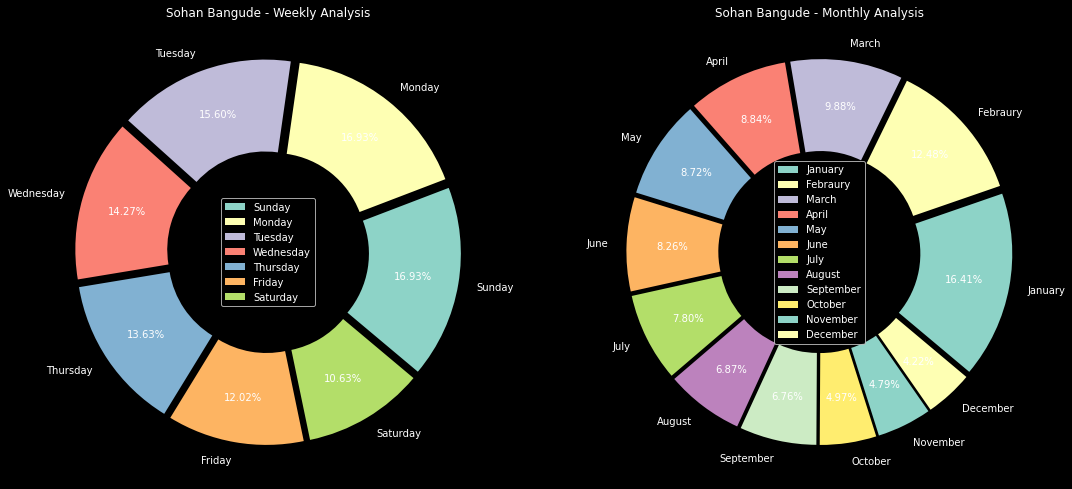

In [41]:
plot_analysis(df)

## World clouds of the group ["Common"]

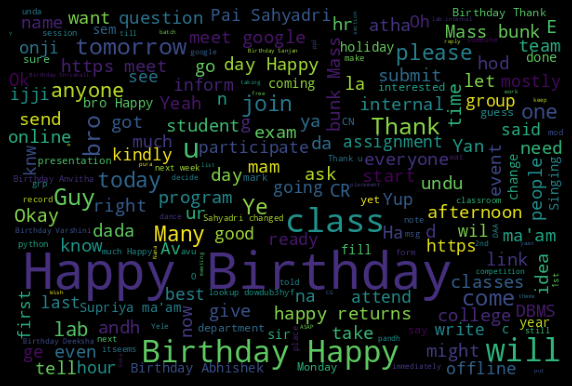

In [42]:
plt.figure(figsize = (10,10))
str_arr = ''

for msg in df.message:
    if(msg != ' <Media omitted>' and msg != " This message was deleted"):
        str_arr += msg


wc = WordCloud(height=400 , width=600 , background_color= "black").generate(str_arr)
plt.axis("off")
plt.imshow(wc)

## Word Clouds of the top applicants ["Overall"]

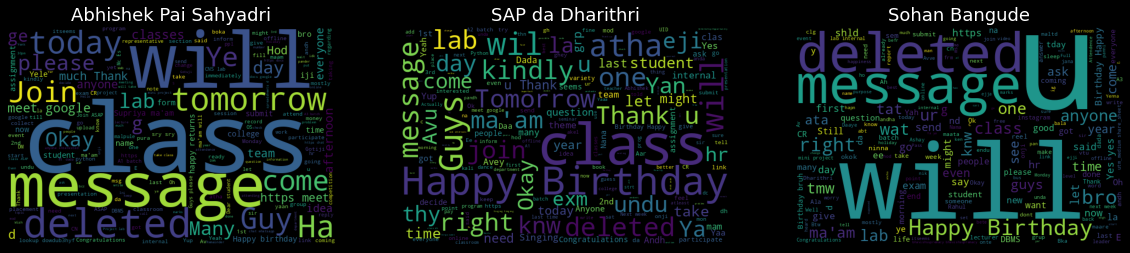

In [43]:
plt.figure(figsize = (20,20))
str_arr = ''
i= 1
top_arr = df["name"].value_counts().nlargest(3).index


for x in top_arr:
    str_arr = ''
    
    plt.subplot(1,3,i)
    top_df = df[df["name"] == x]
    str_arr = " ".join([msg for msg in top_df["message"] if msg != ' <Media omitted>'])
    
    
    wc = WordCloud(height=400 , width=600 , background_color= "black").generate(str_arr)
    plt.title(x,fontdict={'fontsize': 18})
    plt.axis("off")
    plt.imshow(wc)
    i+=1

## Histplot of the sent time of the chat ["Common"]

In [44]:
df.hours.unique()

array([ 7, 12,  9, 22, 10, 13, 11,  8, 14,  0, 15, 16, 21, 19,  6, 20, 23,
       17, 18,  5,  2,  4,  1,  3])

/home/arvin/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours'>

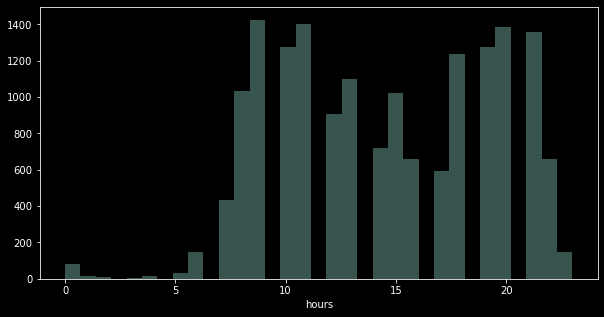

In [45]:
plt.figure(figsize = (10,5))
sns.distplot(df.hours,kde= False,)

## Emoji Analysis

In [46]:
msg = 'helo ❤️'

for c in msg:
    if emoji.is_emoji(c):
        cnt = Counter(c)
        
print(cnt)

Counter({'❤': 1})


In [47]:
emos = []
for msg in df.message:
    for c in msg:
        if emoji.is_emoji(c):
            emos.extend(c)

In [48]:
emo = [c for msg in df.message for c in msg if emoji.is_emoji(c)]

In [49]:
### Code for the emoji extraction
cnt = Counter([c for msg in df.message for c in msg if emoji.is_emoji(c)])

In [50]:
emo_df = pd.DataFrame(Counter([c for msg in df.message for c in msg if emoji.is_emoji(c)]).most_common(10), columns = ['emoji','count'])



In [51]:
emo_df.head()

emoji  count
0     🥳   1976
1     😂   1491
2     🎉    464
3     🏻    460
4     🔥    410

In [52]:
### Top 10 emojis in pie chart["Common"]

#plt.figure(figsize = (5,5))
fig = px.pie(data_frame=emo_df , values = emo_df['count'] , names= emo_df['emoji'], title = 'Emoji Analysis' , hole= 0.5, color_discrete_sequence= px.colors.sequential.Greens_r)
fig.update_traces(textposition = 'inside' , textinfo = 'percent+label',)
fig.show()


In [53]:
### Analysis of emojis used by top 3 participants

def emoji_analysis():
    top_arr = df["name"].value_counts().nlargest(3).index
    
    for x in top_arr:
        
        top_df = df[df["name"] == x]
        
        cnt = Counter([c for msg in top_df.message for c in msg if emoji.is_emoji(c)])
        emo_df = pd.DataFrame(cnt.most_common(10), columns = ['emoji','count'])
        
        fig = px.pie(data_frame=emo_df , values = emo_df['count'] , names= emo_df['emoji'], title = x , hole= 0.5)
        fig.update_traces(textposition = 'inside' , textinfo = 'percent+label')
        
        fig.show()
        

In [54]:
emoji_analysis()

# Timeline

<AxesSubplot:xlabel='month_year', ylabel='month_year'>

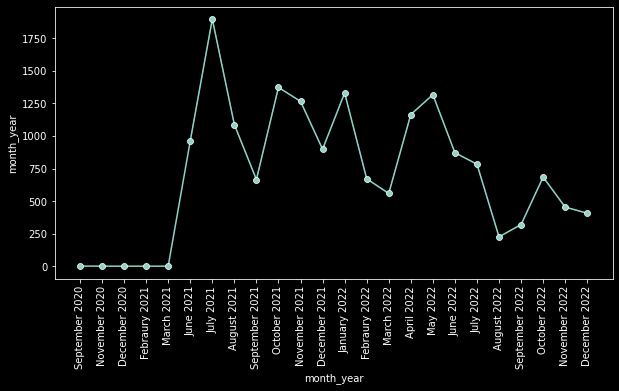

In [55]:
### Timeline of the month
month_timeline = df["month_year"].value_counts().to_dict()

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90)
sns.lineplot(data = df,x = 'month_year', y = df["month_year"].map(month_timeline) , markers = True , marker = 'o')

<AxesSubplot:xlabel='week_day', ylabel='week_day'>

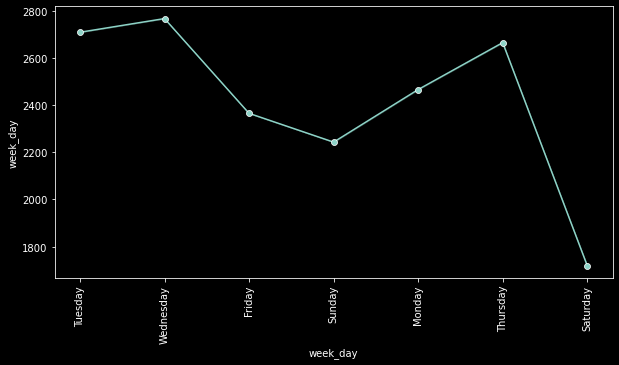

In [56]:
### Timeline of the days
week_timeline = df["week_day"].value_counts().to_dict()

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90)
sns.lineplot(data = df,x = 'week_day', y = df["week_day"].map(week_timeline) , markers = True , marker = 'o',sort = False,)

In [57]:
date = df["date"].dt.date
date_timeline = date.value_counts().to_dict()

<AxesSubplot:xlabel='date', ylabel='date'>

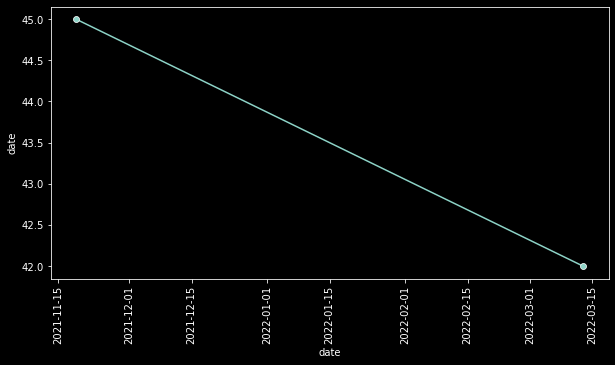

In [58]:
plt.figure(figsize= (10,5))
plt.xticks(rotation = 90)

sns.lineplot(data = df,x = 'date', y = df["date"].map(date_timeline) , markers = True , marker = 'o')


<AxesSubplot:xlabel='week_day'>

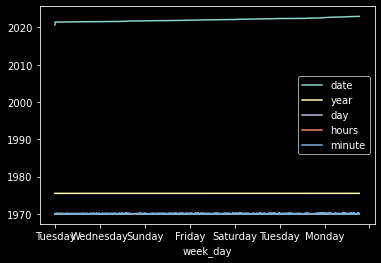

In [59]:
df.set_index("week_day").plot()

In [60]:
df["period"] = df.hours.apply(lambda x : str(x) + "-0" if x==23 else str(x) + "-" + str(x+1))
df.sample(10)

date                   name                       message  \
7102 2021-11-28 09:18:00  Abhishek Pai Sahyadri               <Media omitted>   
4047 2021-09-14 15:38:00          Sohan Bangude               Not gonna give😂   
5353 2021-10-24 19:44:00        +91 91191 46001      This message was deleted   
308  2021-06-17 19:05:00       SAP da Dharithri   First event organized by me   
7344 2021-12-06 08:31:00  Abhishek Pai Sahyadri        1st floor seminar hall   
1516 2021-07-09 14:38:00        +91 91191 46001               <Media omitted>   
9255 2022-01-29 10:50:00        +91 96067 80002                            xD   
1752 2021-07-17 14:15:00       SAP da Dharithri                            😂😂   
8880 2022-01-23 21:22:00         Sanju Sahyadri          Happy Birthday bro🎂🥳   
9459 2022-01-31 17:25:00            Abhi Kenaje             Whats the reason?   

          month  year  day   week_day  hours  minute      month_year period  
7102   November  2021   28   Saturday      9      18   November 2021   9-10  
4047  September  2021   14     Monday     15      38  September 2021  15-16  
5353    October  2021   24   Saturday     19      44    October 2021  19-20  
308        June  2021   17  Wednesday     19       5       June 2021  19-20  
7344   December  2021    6     Sunday      8      31   December 2021    8-9  
1516       July  2021    9   Thursday     14      38       July 2021  14-15  
9255    January  2022   29     Friday     10      50    January 2022  10-11  
1752       July  2021   17     Friday     14      15       July 2021  14-15  
8880    January  2022   23   Saturday     21      22    January 2022  21-22  
9459    January  2022   31     Sunday     17      25    January 2022  17-18

In [61]:
df.period.value_counts()

9-10     1424
11-12    1399
20-21    1386
21-22    1360
10-11    1276
19-20    1274
18-19    1238
13-14    1099
8-9      1035
15-16    1023
12-13     907
14-15     719
22-23     658
16-17     657
17-18     591
7-8       433
23-0      150
6-7       150
0-1        82
5-6        31
4-5        15
1-2        14
2-3         9
3-4         4
Name: period, dtype: int64

In [62]:
df.period.unique()

array(['7-8', '12-13', '9-10', '22-23', '10-11', '13-14', '11-12', '8-9',
       '14-15', '0-1', '15-16', '16-17', '21-22', '19-20', '6-7', '20-21',
       '23-0', '17-18', '18-19', '5-6', '2-3', '4-5', '1-2', '3-4'],
      dtype=object)

In [63]:
pivot = pd.pivot_table(df.sort_values(["period"],ascending=False ,ignore_index= True , na_position= "last") , index = "week_day", columns=df["period"], values = "message" , aggfunc= "count" ,sort=False).fillna(0)


In [64]:
pivot.sort_values()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [ ]:
### OVERALL COMMON
plt.figure(figsize=(10,5))

period_arr = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-0']
sns.heatmap(pd.pivot_table(df , index = "week_day" , columns= "period", values = "message" , aggfunc= "count" ,sort=False).fillna(0).reindex(index = days_arr , columns = period_arr) , cmap = "nipy_spectral")


In [ ]:
plt.figure(figsize=(10,5))

top_participants_df.head()
    
sns.heatmap(pd.pivot_table(top_participants_df , index = "month" , columns= "name", values = "message" , aggfunc= "count" ,sort=False).fillna(0).reindex(index = month_arr))


In [ ]:
sns.heatmap(pd.pivot_table(top_participants_df , index = "week_day" , columns= "name", values = "message" , aggfunc= "count" ,sort=False).fillna(0).reindex(index = days_arr))

In [ ]:
sns.heatmap(pd.pivot_table(top_participants_df , index = "week_day" , columns= "month_year", values = "message" , aggfunc= "count" ,sort=False).fillna(0).reindex(index = days_arr))

In [66]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [68]:
sent_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
2023-03-13 10:16:29.311881: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-13 10:16:29.311993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-03-13 10:16:29.313246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [69]:
sent_analysis("happy")

[{'label': 'POSITIVE', 'score': 0.9998753070831299}]

In [70]:
df = df[df["name"] == "Likith U CS Sahyadri"]

In [74]:
arr = []

for x in df.message:
    if x ==  " <Media omitted>" or "This message was deleted" in x:
        arr.append("Neutral")
    else:
        arr.append(sent_analysis(x)[0]['label'])

In [ ]:
len(sent_arr)

In [75]:
df["sentiment"] = arr

In [76]:
df.head()

date                  name  \
1   2020-09-17 12:16:00  Likith U CS Sahyadri   
56  2021-06-09 00:07:00  Likith U CS Sahyadri   
115 2021-06-09 09:54:00  Likith U CS Sahyadri   
227 2021-06-16 09:23:00  Likith U CS Sahyadri   
271 2021-06-16 14:29:00  Likith U CS Sahyadri   

                                              message      month  year  day  \
1     https://mayurpai.github.io/TuPhodega/index.html  September  2020   17   
56                       Happy Birthday Abhishek 🥳🥳🎂🎂       June  2021    9   
115                    Happy Birthday @918431987214 🥳       June  2021    9   
227                         Happy Birthday Samarth🥳🥳🎂       June  2021   16   
271                       Congratulations Dharithri🥳🔥       June  2021   16   

      week_day  hours  minute      month_year period sentiment  
1    Wednesday     12      16  September 2020  12-13  NEGATIVE  
56     Tuesday      0       7       June 2021    0-1  POSITIVE  
115    Tuesday      9      54       June 2021   9-10  POSITIVE  
227    Tuesday      9      23       June 2021   9-10  POSITIVE  
271    Tuesday     14      29       June 2021  14-15  POSITIVE

<AxesSubplot:xlabel='month_year', ylabel='sentiment'>

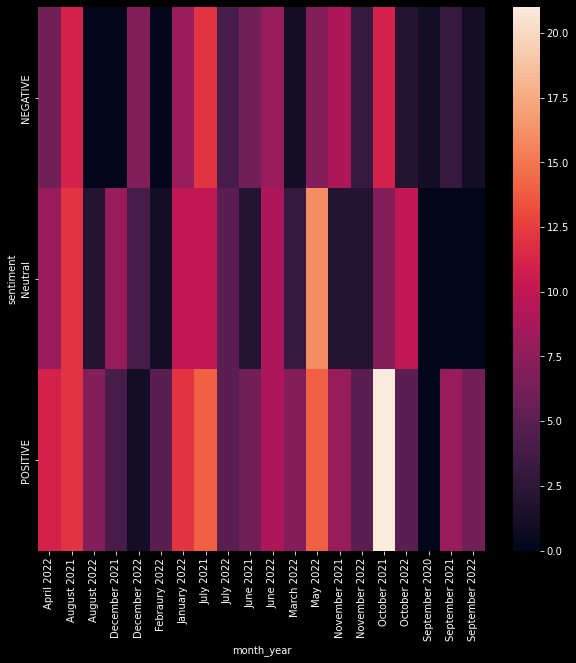

In [80]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.pivot_table(data = df , index = "sentiment" , columns = "month_year" , values = "message", aggfunc = "count").fillna(0))

In [78]:
df["only_date"] = df["date"].dt.date
df.head()

date                  name  \
1   2020-09-17 12:16:00  Likith U CS Sahyadri   
56  2021-06-09 00:07:00  Likith U CS Sahyadri   
115 2021-06-09 09:54:00  Likith U CS Sahyadri   
227 2021-06-16 09:23:00  Likith U CS Sahyadri   
271 2021-06-16 14:29:00  Likith U CS Sahyadri   

                                              message      month  year  day  \
1     https://mayurpai.github.io/TuPhodega/index.html  September  2020   17   
56                       Happy Birthday Abhishek 🥳🥳🎂🎂       June  2021    9   
115                    Happy Birthday @918431987214 🥳       June  2021    9   
227                         Happy Birthday Samarth🥳🥳🎂       June  2021   16   
271                       Congratulations Dharithri🥳🔥       June  2021   16   

      week_day  hours  minute      month_year period sentiment   only_date  
1    Wednesday     12      16  September 2020  12-13  NEGATIVE  2020-09-17  
56     Tuesday      0       7       June 2021    0-1  POSITIVE  2021-06-09  
115    Tuesday      9      54       June 2021   9-10  POSITIVE  2021-06-09  
227    Tuesday      9      23       June 2021   9-10  POSITIVE  2021-06-16  
271    Tuesday     14      29       June 2021  14-15  POSITIVE  2021-06-16

<AxesSubplot:xlabel='only_date', ylabel='sentiment'>

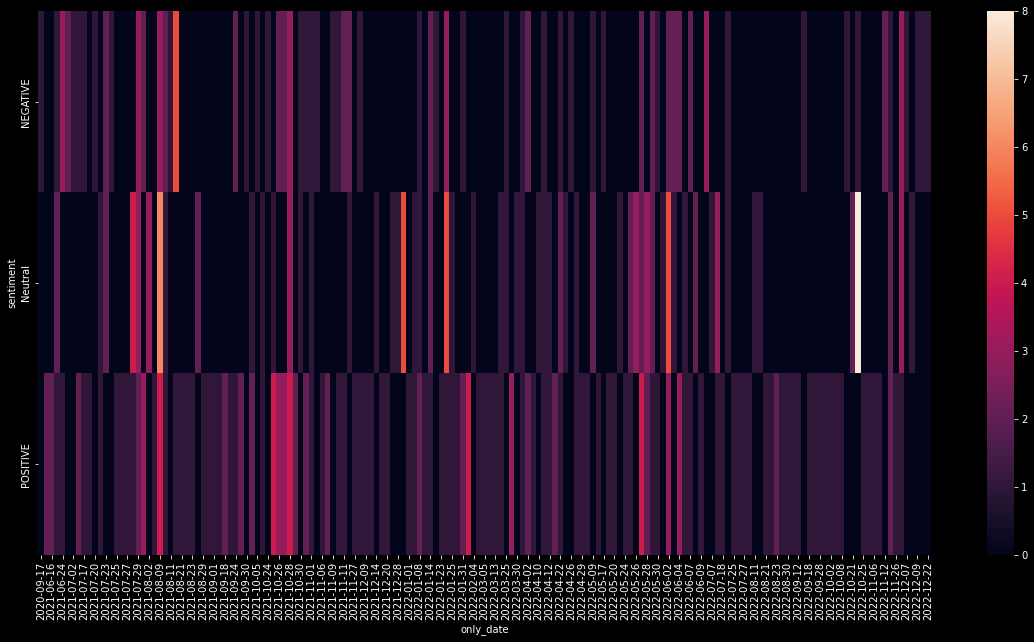

In [82]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.pivot_table(data = df , index = "sentiment" , columns = "only_date" , values = "message", aggfunc = "count").fillna(0))